In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
from scipy.stats import chi2_contingency, ttest_ind, f_oneway

# Load dataset (adjust file path as needed)
df = pd.read_csv("/content/drive/My Drive/cleaned_data_final_output.csv")

# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=[np.number])





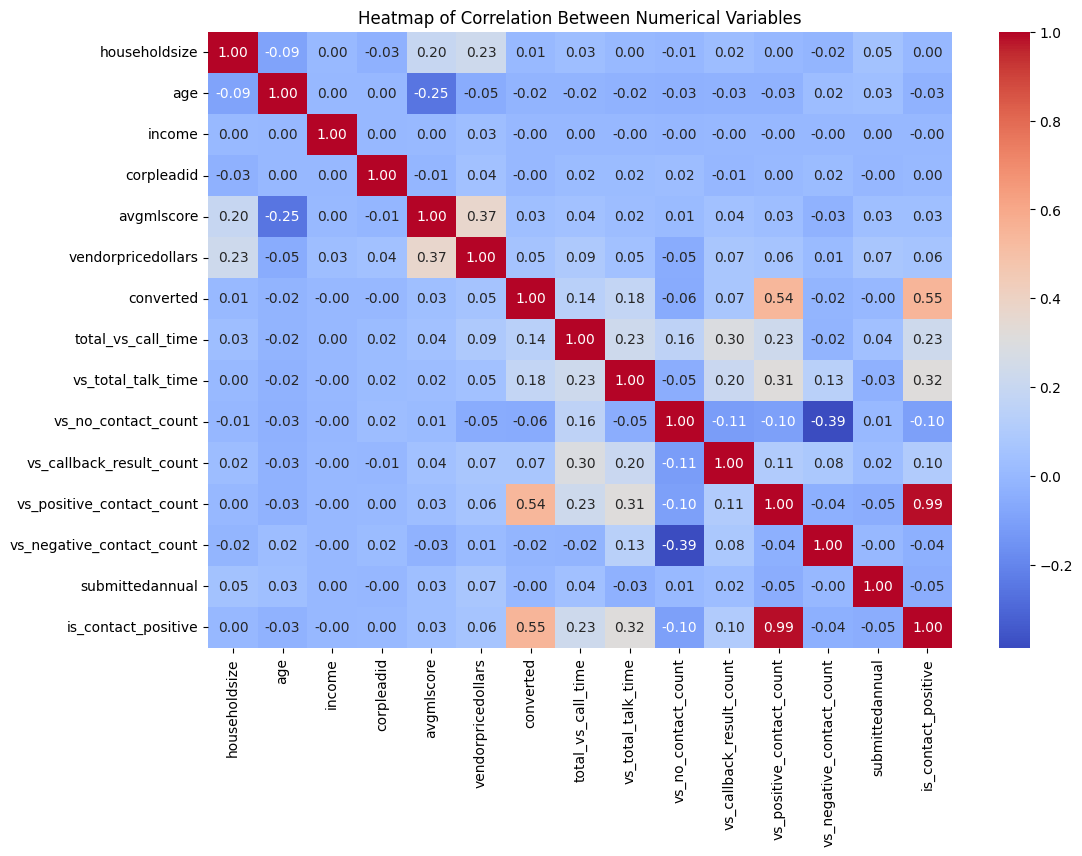

In [ ]:
# Create a heatmap of correlation
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Correlation Between Numerical Variables")
plt.show()

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Save the correlation matrix to a CSV file
correlation_matrix.to_csv("/content/drive/My Drive/correlation_matrix.csv")

In [ ]:
# Chi-Square Test for Categorical Variables
categorical_cols = df.select_dtypes(include=['object']).columns
chi2_results = {}

for col in categorical_cols:
    if df[col].nunique() > 1:  # Ensure there is more than one category
        contingency_table = pd.crosstab(df[col], df['converted'])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi2_results[col] = {"Chi2 Stat": chi2, "p-value": p}

# Convert results into DataFrame
chi2_df = pd.DataFrame.from_dict(chi2_results, orient="index")

# Save Chi-Square test results to CSV
chi2_df.to_csv("/content/drive/My Drive/chi_square_results.csv")

# Display results
print("Chi-Square Test Results:")
print(chi2_df.head())

Chi-Square Test Results:
                     Chi2 Stat       p-value
leadcreatedtime  548072.973883  0.000000e+00
soldtoagenttime  562125.839852  0.000000e+00
mpleadid         297590.764970  9.992124e-01
phonetype           261.766368  5.503612e-52
state               143.725144  8.219556e-15


In [ ]:
# T-Test for mean comparison between converted and non-converted leads
numerical_cols = numerical_df.columns
for col in numerical_cols:
    converted_group = df[df['converted'] == 1][col]
    non_converted_group = df[df['converted'] == 0][col]
    t_stat, p_value = ttest_ind(converted_group.dropna(), non_converted_group.dropna(), equal_var=False)
    print(f"T-Test for {col}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")


T-Test for householdsize: t-statistic = 5.2103, p-value = 0.0000
T-Test for age: t-statistic = -16.1209, p-value = 0.0000
T-Test for income: t-statistic = -1.6280, p-value = 0.1035
T-Test for corpleadid: t-statistic = -3.0432, p-value = 0.0024
T-Test for avgmlscore: t-statistic = 20.4171, p-value = 0.0000
T-Test for vendorpricedollars: t-statistic = 26.7661, p-value = 0.0000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


T-Test for converted: t-statistic = inf, p-value = 0.0000
T-Test for total_vs_call_time: t-statistic = 44.5796, p-value = 0.0000
T-Test for vs_total_talk_time: t-statistic = 29.9589, p-value = 0.0000
T-Test for vs_no_contact_count: t-statistic = -48.7547, p-value = 0.0000
T-Test for vs_callback_result_count: t-statistic = 25.1498, p-value = 0.0000
T-Test for vs_positive_contact_count: t-statistic = 83.9989, p-value = 0.0000
T-Test for vs_negative_contact_count: t-statistic = -16.1897, p-value = 0.0000
T-Test for submittedannual: t-statistic = 0.0000, p-value = 1.0000
T-Test for is_contact_positive: t-statistic = 86.2756, p-value = 0.0000


--2025-02-17 21:45:17--  https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
Resolving naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)... 52.92.226.193, 52.92.129.241, 52.92.154.193, ...
Connecting to naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)|52.92.226.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip’

ne_110m_admin_0_cou 100%[===================>] 209.94K   848KB/s    in 0.2s    

2025-02-17 21:45:18 (848 KB/s) - ‘ne_110m_admin_0_countries.zip’ saved [214976/214976]

Archive:  ne_110m_admin_0_countries.zip
  inflating: ne_110m_admin_0_countries.README.html  
 extracting: ne_110m_admin_0_countries.VERSION.txt  
 extracting: ne_110m_admin_0_countries.cpg  
  inflating: ne_110m_admin_0_countries.dbf  
  inflating: ne_110m_admin_0_countries.prj  
  inflating: ne_110m_admin_0_countries.shp  
  inflating: ne_110m_admin_0_count

<ipython-input-8-c48cbba13e57>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_conversion, x='state', y='conversion_rate', palette='coolwarm')


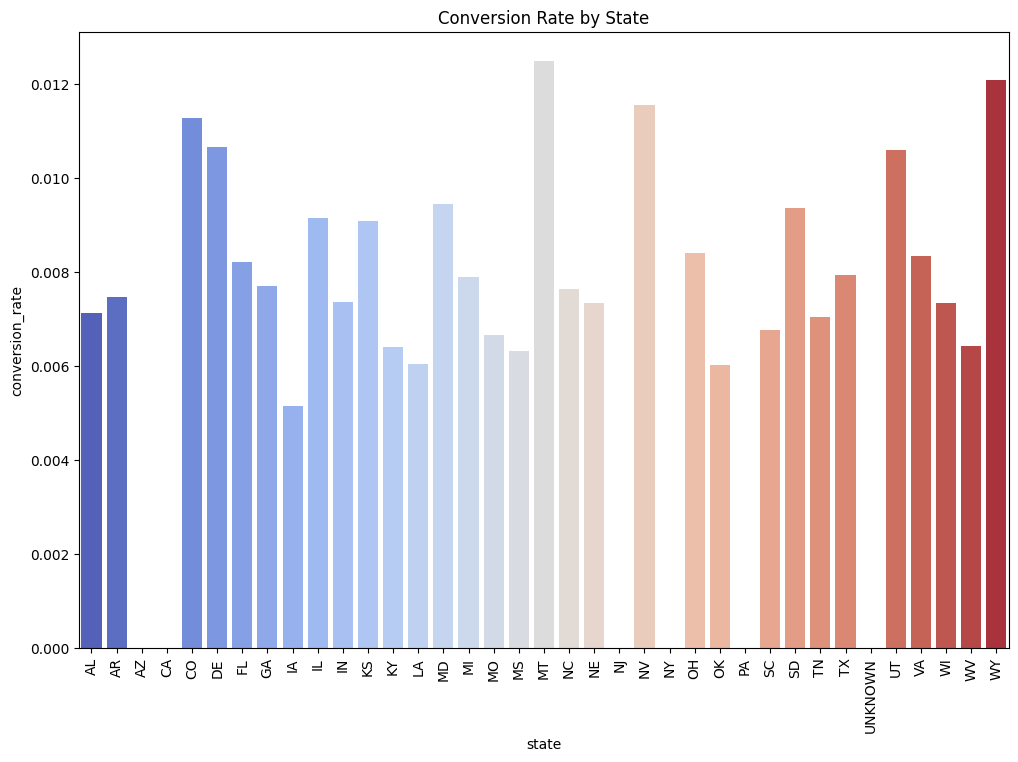

Geographic conversion rate analysis completed.


In [ ]:
# Geographic Analysis
!pip install geopandas
import geopandas as gpd

# Geographic Analysis
if 'state' in df.columns:
    # Instead of using geopandas.datasets, download the data directly
    !wget https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
    !unzip ne_110m_admin_0_countries.zip
    world = gpd.read_file("ne_110m_admin_0_countries.shp")  # Load the world map

    state_conversion = df.groupby('state')['converted'].mean().reset_index()
    state_conversion.columns = ['state', 'conversion_rate']

    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(12, 8))
    sns.barplot(data=state_conversion, x='state', y='conversion_rate', palette='coolwarm')
    plt.xticks(rotation=90)
    plt.title("Conversion Rate by State")
    plt.show()

    print("Geographic conversion rate analysis completed.")